In [2]:
import numpy as np

MAX_GREY_LEVEL = 255
EPSILON_GREY_LEVEL = 0.1

In [70]:
import math

mu_r = 0.025
sigma_r = 0.0

grain_radius = mu_r
grain_std = sigma_r

lambda_list = np.zeros(MAX_GREY_LEVEL)
exp_lambda_list = np.zeros(MAX_GREY_LEVEL)
for i in range(MAX_GREY_LEVEL):
    u = i / (MAX_GREY_LEVEL + EPSILON_GREY_LEVEL)
    ag = 1 / math.ceil(1 / grain_radius)
    lambda_temp = -(ag ** 2 / (math.pi * (grain_radius ** 2 + grain_std ** 2))) * math.log(1.0 - u)
    lambda_list[i] = lambda_temp
    exp_lambda_list[i] = math.exp(-lambda_temp)
    
exp_lambda_list

array([1.        , 0.99875054, 0.99749773, 0.99624154, 0.99498195,
       0.99371893, 0.99245247, 0.99118253, 0.98990911, 0.98863216,
       0.98735167, 0.98606762, 0.98477997, 0.98348871, 0.98219381,
       0.98089524, 0.97959298, 0.978287  , 0.97697727, 0.97566378,
       0.97434648, 0.97302537, 0.9717004 , 0.97037154, 0.96903878,
       0.96770209, 0.96636142, 0.96501677, 0.96366808, 0.96231535,
       0.96095853, 0.95959759, 0.9582325 , 0.95686324, 0.95548977,
       0.95411206, 0.95273008, 0.95134379, 0.94995316, 0.94855815,
       0.94715874, 0.94575489, 0.94434656, 0.94293371, 0.94151632,
       0.94009434, 0.93866775, 0.93723649, 0.93580054, 0.93435985,
       0.93291439, 0.93146412, 0.930009  , 0.92854898, 0.92708403,
       0.92561411, 0.92413917, 0.92265917, 0.92117407, 0.91968383,
       0.91818839, 0.91668772, 0.91518178, 0.9136705 , 0.91215385,
       0.91063179, 0.90910425, 0.9075712 , 0.90603258, 0.90448835,
       0.90293845, 0.90138283, 0.89982144, 0.89825423, 0.89668

In [75]:
ag = 1 / math.ceil(1 / grain_radius)
possible_values = np.arange(MAX_GREY_LEVEL) / (MAX_GREY_LEVEL + EPSILON_GREY_LEVEL)
lambdas = -(ag ** 2 / (np.pi * (grain_radius ** 2 + grain_std ** 2))) * np.log(1.0 - possible_values)
lambda_exps = np.exp(-lambdas)
lambda_exps

array([1.        , 0.99875054, 0.99749773, 0.99624154, 0.99498195,
       0.99371893, 0.99245247, 0.99118253, 0.98990911, 0.98863216,
       0.98735167, 0.98606762, 0.98477997, 0.98348871, 0.98219381,
       0.98089524, 0.97959298, 0.978287  , 0.97697727, 0.97566378,
       0.97434648, 0.97302537, 0.9717004 , 0.97037154, 0.96903878,
       0.96770209, 0.96636142, 0.96501677, 0.96366808, 0.96231535,
       0.96095853, 0.95959759, 0.9582325 , 0.95686324, 0.95548977,
       0.95411206, 0.95273008, 0.95134379, 0.94995316, 0.94855815,
       0.94715874, 0.94575489, 0.94434656, 0.94293371, 0.94151632,
       0.94009434, 0.93866775, 0.93723649, 0.93580054, 0.93435985,
       0.93291439, 0.93146412, 0.930009  , 0.92854898, 0.92708403,
       0.92561411, 0.92413917, 0.92265917, 0.92117407, 0.91968383,
       0.91818839, 0.91668772, 0.91518178, 0.9136705 , 0.91215385,
       0.91063179, 0.90910425, 0.9075712 , 0.90603258, 0.90448835,
       0.90293845, 0.90138283, 0.89982144, 0.89825423, 0.89668

In [77]:
np.array_equal(lambda_exps, exp_lambda_list)

True

In [3]:
from PIL import Image

file_name_in = "data/digital/small.png"

image_in = Image.open(file_name_in)
img_in = np.asarray(image_in)
img_in = img_in.astype(float) / (MAX_GREY_LEVEL + EPSILON_GREY_LEVEL)  # normalize the image array

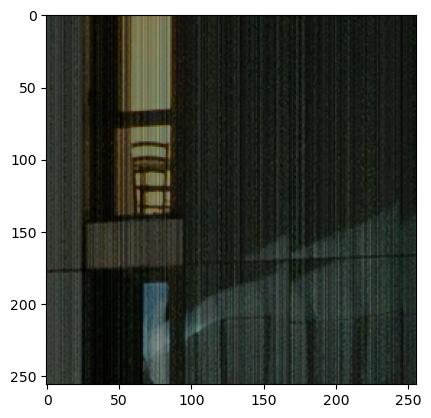

In [16]:
import matplotlib.pyplot as plt
img = np.load("final_image.npy")
plt.figure()
MAX_GREY_LEVEL = 255
EPSILON_GREY_LEVEL = 0.1
final_image = (((img/100) * (MAX_GREY_LEVEL + EPSILON_GREY_LEVEL)).astype(np.uint8))
plt.imshow(final_image)

In [17]:
file_name_out = "test_gpu.png"
image_out = Image.fromarray(final_image)
image_out.save(file_name_out)

In [38]:
import math
height_in = 256
width_in = 256
block_size = (16, 16, 1)
grid = (math.ceil(height_in / block_size[0]), math.ceil(width_in / block_size[1]))
grid

(16, 16)